Datasett oppgave 3

In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/MartinLOlsen/ISTG-prosjekt-16/main/ny_data_oppgave_3.csv", header=0)

print(df)

    maaling nr.  hoyde (laser)  hoyde (maalebaand)
0             1          227.0               226.0
1             2          226.0               225.5
2             3          228.0               226.0
3             4          227.5               225.0
4             5          228.0               223.5
5             6          226.5               225.5
6             7          226.5               222.5
7             8          229.0               223.5
8             9          225.5               225.0
9            10          227.0               225.0
10           11          226.5               222.0
11           12          228.0               222.5
12           13          227.5               223.5
13           14          227.0               223.0
14           15          227.0               221.5
15           16          226.5               223.5
16           17          225.5               222.0
17           18          228.0               222.5
18           19          227.0 

Nøkkeltall oppgave 3

In [29]:
X_snitt_laser = np.mean(df["hoyde (laser)"])
print(f"Gjennomsnittet av lasermålingene er {round(X_snitt_laser, 4)}")

SD_X_laser = np.std(df["hoyde (laser)"])
print(f"Standardavviket til lasermålingene er {round(SD_X_laser, 4)}")

X_snitt_maalebaand = np.mean(df["hoyde (maalebaand)"])
print(f"Gjennomsnittet av målebånd-målingene er {round(X_snitt_maalebaand, 4)}")

SD_X_maalebaand = np.std(df["hoyde (maalebaand)"])
print(f"Standardavviket til målebånd-målingene er {round(SD_X_maalebaand, 4)}")

Gjennomsnittet av lasermålingene er 227.2
Standardavviket til lasermålingene er 0.8185
Gjennomsnittet av målebånd-målingene er 223.62
Standardavviket til målebånd-målingene er 1.1382


Usikkerhet for linjal

In [30]:
n = df['maaling nr.'].count() # antall målinger
SE_laser = SD_X_laser / np.sqrt(n) # standardfeil for laser

t = stats.t.ppf(0.975, n - 1) # t-verdi for 95% konfidensintervall
margin_laser = t * SE_laser
nedre_laser = X_snitt_laser - margin_laser # nedre grense i konfidensintervallet
ovre_laser = X_snitt_laser + margin_laser # øvre grense i konfidensintervallet

print(f'Standardfeil for laser: {SE_laser:.4f}')
print(f'95% konfidensintervall: [{nedre_laser:.4f}, {ovre_laser:.4f}]')

Standardfeil for laser: 0.1158
95% konfidensintervall: [226.9674, 227.4326]


Usikkerhet for målebånd

In [31]:
n = df['maaling nr.'].count() # antall målinger
SE_maalebaand = SD_X_maalebaand / np.sqrt(n) # standardfeil for målebånd

t= stats.t.ppf(0.975, n - 1) # t-verdi for 95% konfidensintervall
margin_maalebaand = t * SE_maalebaand
nedre_maalebaand = X_snitt_maalebaand - margin_maalebaand # nedre grense i konfidensintervallet
ovre_maalebaand = X_snitt_maalebaand + margin_maalebaand # øvre grense i konfidensintervallet

print(f'Standardfeil for målebånd: {SE_maalebaand:.4f}')
print(f'95% konfidensintervall: [{nedre_maalebaand:.4f}, {ovre_maalebaand:.4f}]')

Standardfeil for målebånd: 0.1610
95% konfidensintervall: [223.2965, 223.9435]


Hypotesetest

Signifikansnivå α = 0.05, dvs H0 forkastes dersom p < 0.05

H0: Ingen forskjell mellom gjennomsnittene til måleinstrumentene (µ_laser = µ_målebånd)
H1: Det er en forskjell på gjennomsnittene (µ_laser =/= µ_målebånd)

In [32]:
l = df["hoyde (laser)"]
m = df["hoyde (maalebaand)"]

T, p = stats.ttest_ind(l, m, equal_var=False)

print(f"T-verdi: {t:.3f}")
print(f"P-verdi: {p}")

if np.abs(T) > t:
    print("Det er en forskjell på gjennomsnittene, H0 forkastes.")
else:
    print("Det er ingen signifikant forskjell mellom gjennomsnittene, H0 forkastes ikke.")

T-verdi: 2.010
P-verdi: 3.3908918731862907e-31
Det er en forskjell på gjennomsnittene, H0 forkastes.


Visualisering

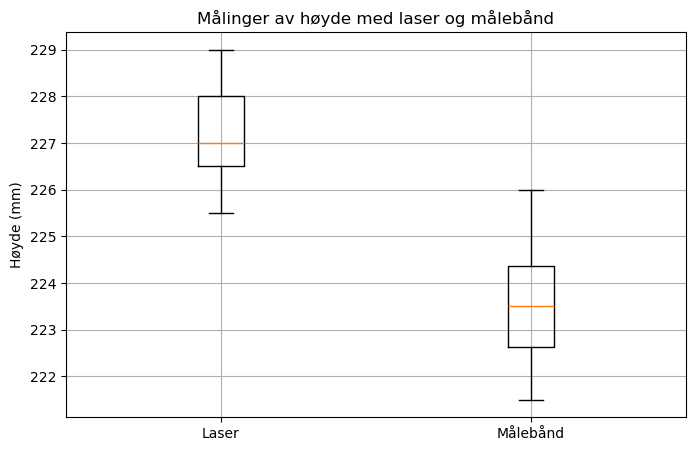

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot([l, m], tick_labels=['Laser', 'Målebånd'])

plt.title('Målinger av høyde med laser og målebånd')
plt.ylabel('Høyde [mm]')
plt.grid(True)
plt.show()